# 운동을 하지 않는 이유에 대한 데이터 분석


In [8]:
#분석을 위한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#데이터 프레임 생성
practice0 = pd.DataFrame({"이름":["홍길동", "김길동"], "나이":[100,200]}) # key : 열 , value : 열의 벡터

In [13]:
practice0

,이름,나이
0,홍길동,100
1,김길동,200


In [14]:
#비어 있는 데이터 프레임생성
practice = pd.DataFrame({"날짜":[],"운동":[],"양":[]})

In [15]:
practice

,날짜,운동,양


In [16]:
#데이터 추가
#loc[행인덱스] => 행인덱스에 한 행을 추가해라
practice.loc[0] = ['19-3-1', "달리기", 1.]
practice

,날짜,운동,양
0,19-3-1,달리기,1.0


In [17]:
practice.loc[1] = ['19-3-2', "걷기", 1.]
practice.loc[2] = ['19-3-3', "달리기", 1.]
practice.loc[3] = ['19-3-4', "계단오르기", 1.]
practice.loc[4] = ['19-3-5', "걷기", 1.5]
practice.loc[5] = ['19-3-6', "달리기", 1.]
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-3,달리기,1.0
3,19-3-4,계단오르기,1.0
4,19-3-5,걷기,1.5
5,19-3-6,달리기,1.0


In [24]:
#생성한 데이터 프레임을 저장하기
practice.to_csv('practice.csv') # 저장위치는 현재위치에서 이루어짐 ~> 예를 들어 현재위치에 하려면 '저장하고싶은 이름'
                                   # 저장위치를 변경하려면 ../ ~> 상대위치를 통해 저장

In [19]:
#CSV데이터 프레임 가져오기
#오토인덱싱 현상 생김
practice2 = pd.read_csv('practice.csv',encoding='utf-8')
practice2

,Unnamed: 0,날짜,운동,양
0,0,19-3-1,달리기,1.0
1,1,19-3-2,걷기,1.0
2,2,19-3-3,달리기,1.0
3,3,19-3-4,계단오르기,1.0
4,4,19-3-5,걷기,1.5
5,5,19-3-6,달리기,1.0


In [20]:
#오토 인덱싱 생긴거 제거 ~> index_col = 0 0번째 열을 인덱스로 사용하기!!
pd.read_csv("practice.csv", index_col = 0, encoding = 'utf-8')

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-3,달리기,1.0
3,19-3-4,계단오르기,1.0
4,19-3-5,걷기,1.5
5,19-3-6,달리기,1.0


In [25]:
practice.loc[6] = ['19-3-7', "달리기", 1.]
practice.loc[7] = ['19-3-8', "걷기", 1.]
practice.loc[8] = ['19-3-9', "걷기", 1.5]
practice.loc[9] = ['19-3-10', "달리기", 1.]
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-3,달리기,1.0
3,19-3-4,계단오르기,1.0
4,19-3-5,걷기,1.5
5,19-3-6,달리기,1.0
6,19-3-7,달리기,1.0
7,19-3-8,걷기,1.0
8,19-3-9,걷기,1.5
9,19-3-10,달리기,1.0


In [27]:
practice3 = pd.read_csv('practice.csv', index_col=0, encoding='utf-8')
practice3

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-3,달리기,1.0
3,19-3-4,계단오르기,1.0
4,19-3-5,걷기,1.5
5,19-3-6,달리기,1.0
6,19-3-7,달리기,1.0
7,19-3-8,걷기,1.0
8,19-3-9,걷기,1.5
9,19-3-10,달리기,1.0


In [29]:
#pivot_table ~> 요약!!!
practice3.pivot_table(index = '운동') #avg 기준! 데이터타입이 숫자인 것만 index기준으로 평균구해줌

,양
운동,
걷기,1.25
계단오르기,1.00
달리기,1.00


In [31]:
# aggfunc : 계산방식 / 디폴트 : 평균
practice3.pivot_table(index = '운동', aggfunc = np.sum) #np.sum : 합계를 구해줌

,양
운동,
걷기,5.0
계단오르기,1.0
달리기,5.0


In [35]:
#여러 arrfunc 사용하기 ~> 리스트 사용(or 튜플)
practice3.pivot_table(index= '운동', aggfunc=[np.sum, np.average, len])

sum average len     
         양       양  날짜    양
운동                         
걷기     5.0    1.25   4  4.0
계단오르기  1.0    1.00   1  1.0
달리기    5.0    1.00   5  5.0

In [38]:
prac_pivot = practice3.pivot('날짜','운동','양') 
                    #날짜 : 인덱스(행), 운동: 종류(열), 양: 테이블 가운데 채워지는 값(양)
prac_pivot
#NaN : 행과 열에 적합한 값이 없다() => 삭제, 수치로 변환해야함
#수치변환 : 평균 / 0 / 기본값으로 변환

운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,NaN,NaN,1.0
19-3-10,NaN,NaN,1.0
19-3-2,1.0,NaN,NaN
19-3-3,NaN,NaN,1.0
19-3-4,NaN,1.0,NaN
19-3-5,1.5,NaN,NaN
19-3-6,NaN,NaN,1.0
19-3-7,NaN,NaN,1.0
19-3-8,1.0,NaN,NaN


In [40]:
#함수의 종류
#파괴함수 : 원본을 변경시켜버림
#비파괴함수 : 원본을 변경하지 않음

prac_pivot.fillna(0) # 0 : nan을 0으로 대체 
prac_pivot #fillna함수는 비파괴함수임 why? 변경되지 않았으니까 따라서, 변화를 주려면 옵션을 주어서 비파괴 -> 파괴로 변경


운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,NaN,NaN,1.0
19-3-10,NaN,NaN,1.0
19-3-2,1.0,NaN,NaN
19-3-3,NaN,NaN,1.0
19-3-4,NaN,1.0,NaN
19-3-5,1.5,NaN,NaN
19-3-6,NaN,NaN,1.0
19-3-7,NaN,NaN,1.0
19-3-8,1.0,NaN,NaN


In [42]:
prac_pivot.fillna(0, inplace=True) #옵션을 통해 파괴함수로 변경
prac_pivot

운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,0.0,0.0,1.0
19-3-10,0.0,0.0,1.0
19-3-2,1.0,0.0,0.0
19-3-3,0.0,0.0,1.0
19-3-4,0.0,1.0,0.0
19-3-5,1.5,0.0,0.0
19-3-6,0.0,0.0,1.0
19-3-7,0.0,0.0,1.0
19-3-8,1.0,0.0,0.0


In [44]:
type(prac_pivot) # 데이터프레임 타입

pandas.core.frame.DataFrame

In [9]:
#운동을 하지 않는 이유분석을 위한 데이터 가져오기
not_exercise = pd.read_excel('../archive/reason_not_exercise.xls')
not_exercise
#현재 인덱스가 딱히 의미가 없음 분류를 통해 인덱스시킴
#또한 분류를 통해 충분히 분류됨 ~> 대분류 drop

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,2017,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8
3,2017,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,2017,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,2017,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,2017,연령별,40대,57.7,6.8,5.2,29.4,1
7,2017,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,2017,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,2017,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [10]:
not_exercise.drop(columns= "기간", inplace= True)#.drop : 행과 열삭제 가능/ columns : 컬럼 삭제

In [11]:
not_exercise

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [185]:
not_exercise.drop(index= range(22, 53), inplace= True) #index : 행을 지울 수 있음 range를 통해 범위 

In [186]:
not_exercise

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [187]:
not_exercise.shape #shape : 행과 열

(22, 7)

In [188]:
#대분류를 통해 연령, 성별, 등등으로 나눠서 분석 조건 주기!!
#not_exercise[] : 조건을 넣기위한 [] 역할
not_exercise['대분류'] == '성별' #대분류 안에 있는 것 중 성별에 해당하는 것만 가져오기 : 불린값 추출 
                                 #브로드캐스팅(백터(열)를 다 돌아 다니면서 확인)
                                 #불린 인덱싱 ~> 인덱싱 방법중 1개 DataFrame에 적용시 DataFrame 반환, Series에 적용시 Series반환

0     False
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
Name: 대분류, dtype: bool

In [189]:
not_ex_sex = not_exercise[not_exercise['대분류'] == '성별'].copy()
not_ex_sex

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8


In [190]:
#대분류 없애기
not_ex_sex.drop(columns='대분류', inplace=True)
not_ex_sex

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,남자,55.2,7.9,5.5,29.8,1.6
2,여자,45.0,8.3,6.0,38.8,1.8


In [191]:
#분류를 인덱스로 하기
not_ex_sex.set_index('분류', inplace=True) #분류를 인덱스로 하기
not_ex_sex

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
남자,55.2,7.9,5.5,29.8,1.6
여자,45.0,8.3,6.0,38.8,1.8


In [193]:
#시각화를 위한 matplotlib 사용하기
import matplotlib.pyplot as plt

In [194]:
#한글로 사용하기 위한 설정(한글처리)
from matplotlib import font_manager , rc

In [195]:
f_path = 'C:/Windows/Fonts/malgun.ttf' #폰트 경로
font_name = font_manager.FontProperties(fname = f_path).get_name()
rc('font', family = font_name)

In [196]:
plt.rcParams['axes.unicode_minus'] = False #그래프에서 글씨 깨지는 거 방지

In [197]:
def call():
    return 100, 200 #파이썬장점 : return 으로 여러개 보낼 수 있음
print(call()) #튜플로 받음

(100, 200)


In [198]:
x, y = call()
print(x, y) #~> x에는 100 , y에는 200이 들어감

100 200


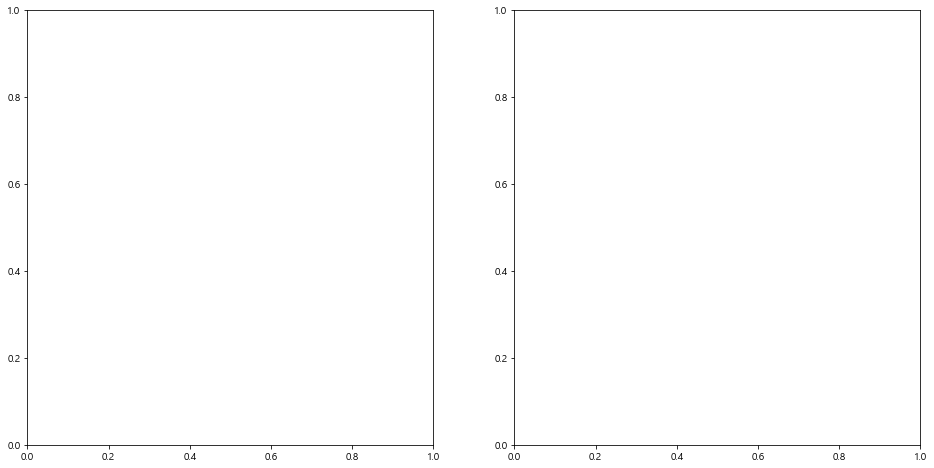

In [199]:
#여러개의 그래프를 그릴때
f, ax = plt.subplots(1, 2, figsize = (16,8))# 1행 2열 : 2개의 그래프 그림, figsize :그래프 크기 조절 f, ax x축 y축


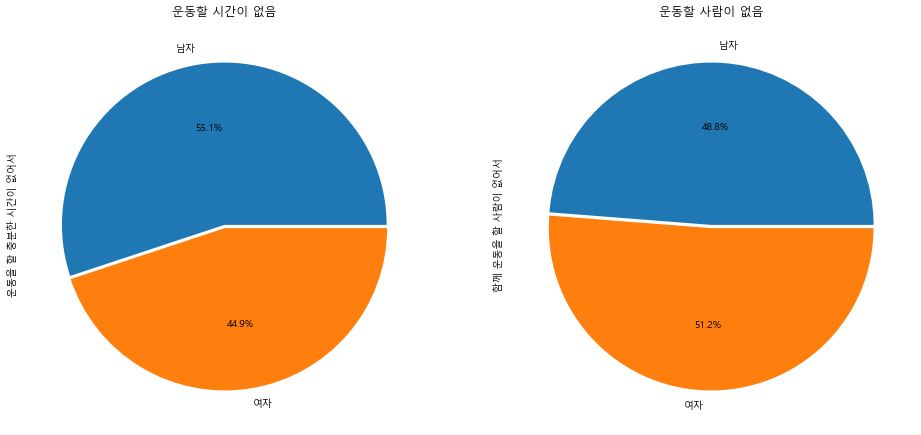

In [200]:
f, ax = plt.subplots(1, 2, figsize = (16,8)) # f : figure => 전체 subplot을 뜻함 ax : axes => 전체중 낱개를 뜻함
not_ex_sex['운동을 할 충분한 시간이 없어서'].plot.pie(explode = [0, 0.02], ax = ax[0], autopct = '%1.1f%%') #컬럼가져와서 그래프 그리기 파이차트 그리기
                                                                            #ax: 축 , autopct : 소수점자리수
ax[0].set_title('운동할 시간이 없음')

not_ex_sex['함께 운동을 할 사람이 없어서'].plot.pie(explode = [0, 0.02], ax = ax[1], autopct = '%1.1f%%')
ax[1].set_title('운동할 사람이 없음')
plt.show()

In [201]:
# 연령별 그려보기
not_ex_age = not_exercise[not_exercise['대분류'] == '연령별'].copy()
not_ex_age

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6


In [202]:
#연령별 데이터프레임 에서 필요없는 부분 삭제 인덱스, 대분류
not_ex_age.drop(columns='대분류', inplace=True)
not_ex_age

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
3,10대,55.7,6.1,5.6,32.2,0.3
4,20대,54.8,6.9,5.2,32.9,0.1
5,30대,58.1,5.5,4.6,31.6,0.2
6,40대,57.7,6.8,5.2,29.4,1
7,50대,50.1,9.2,7.2,32.2,1.4
8,60대 이상,27.5,12.8,6.9,46.8,6


In [203]:
not_ex_age.set_index('분류', inplace=True)
not_ex_age

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
10대,55.7,6.1,5.6,32.2,0.3
20대,54.8,6.9,5.2,32.9,0.1
30대,58.1,5.5,4.6,31.6,0.2
40대,57.7,6.8,5.2,29.4,1
50대,50.1,9.2,7.2,32.2,1.4
60대 이상,27.5,12.8,6.9,46.8,6


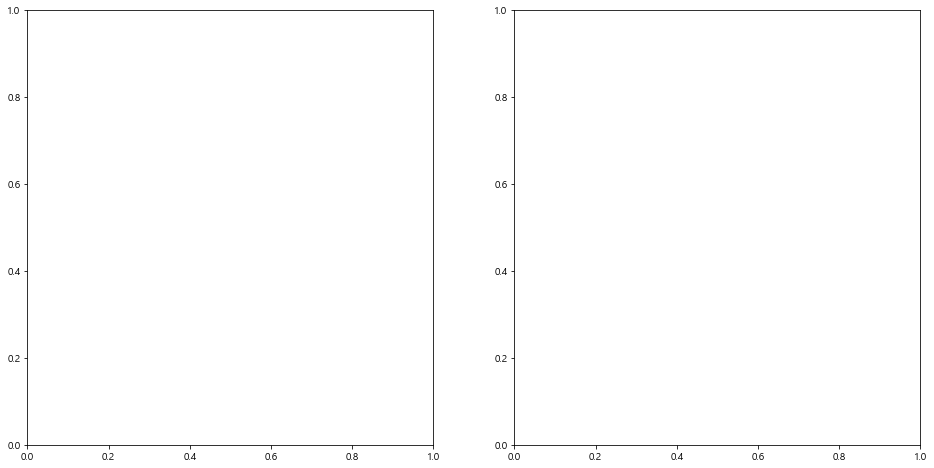

In [204]:
fig , ax = plt.subplots(1, 2, figsize = (16, 8))

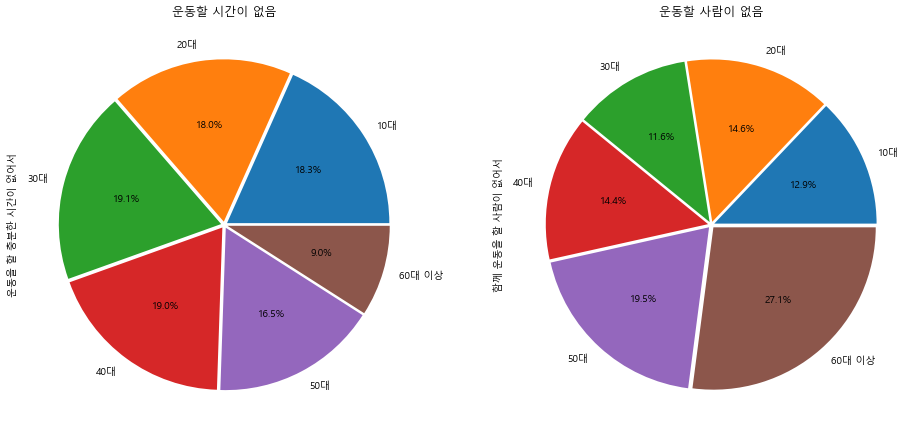

In [205]:
f, ax1 = plt.subplots(1, 2, figsize = (16,8)) # f : figure => 전체 subplot을 뜻함 ax : axes => 전체중 낱개를 뜻함
not_ex_age['운동을 할 충분한 시간이 없어서'].plot.pie(explode = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02], ax = ax1[0], autopct = '%1.1f%%') #컬럼가져와서 그래프 그리기 파이차트 그리기
                                                                            #ax: 축 , autopct : 소수점자리수
                                                                            #explode : 각 영역(피자조각) 간의 간격
ax1[0].set_title('운동할 시간이 없음')

not_ex_age['함께 운동을 할 사람이 없어서'].plot.pie(explode = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02], ax = ax1[1], autopct = '%1.1f%%')
ax1[1].set_title('운동할 사람이 없음')
plt.show()

In [221]:
#학력별
not_ex_std = not_exercise[not_exercise['대분류'] == '학력별'].copy()
not_ex_std

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
9,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4
10,학력별,고졸 이하,46.3,8.5,6.9,36.5,1.7
11,학력별,대졸 이하,57.4,6.6,4.9,30.7,0.4
12,학력별,대학원 이상,65.3,3.8,0.6,29.6,0.6


In [222]:
not_ex_std.drop(columns='대분류', inplace=True)
not_ex_std

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
9,중졸 이하,26.1,13.7,6.6,46.2,7.4
10,고졸 이하,46.3,8.5,6.9,36.5,1.7
11,대졸 이하,57.4,6.6,4.9,30.7,0.4
12,대학원 이상,65.3,3.8,0.6,29.6,0.6


In [223]:
not_ex_std.set_index('분류', inplace=True)
not_ex_std

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
중졸 이하,26.1,13.7,6.6,46.2,7.4
고졸 이하,46.3,8.5,6.9,36.5,1.7
대졸 이하,57.4,6.6,4.9,30.7,0.4
대학원 이상,65.3,3.8,0.6,29.6,0.6


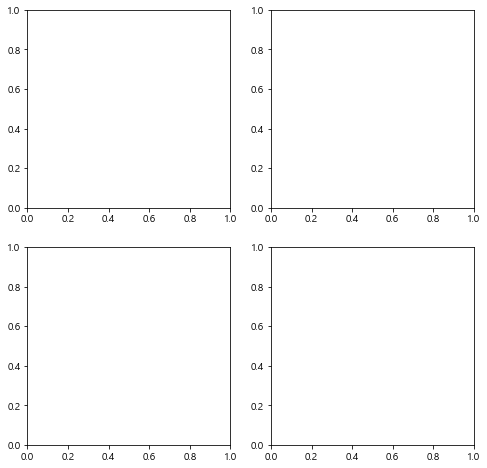

In [239]:
f , ax3 = plt.subplots(2, 2, figsize = (8,8))

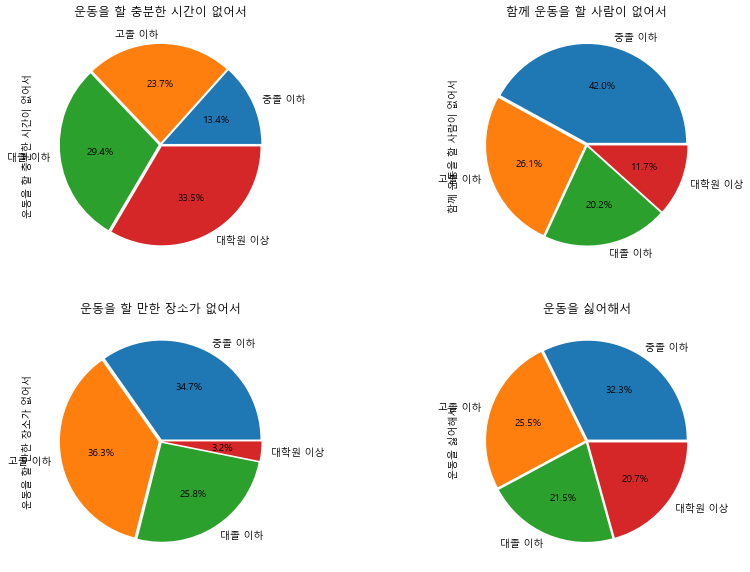

In [248]:
f , ax3 = plt.subplots(2, 2, figsize = (14,10))
not_ex_std['운동을 할 충분한 시간이 없어서'].plot.pie(explode = [0.02,0.02,0.02,0.02], ax = ax3[0][0], autopct = '%1.1f%%' )
not_ex_std['함께 운동을 할 사람이 없어서'].plot.pie(explode = [0.02,0.02,0.02,0.02], ax = ax3[0][1], autopct = '%1.1f%%' )
not_ex_std['운동을 할 만한 장소가 없어서'].plot.pie(explode = [0.02,0.02,0.02,0.02], ax = ax3[1][0], autopct = '%1.1f%%' )
not_ex_std['운동을 싫어해서'].plot.pie(explode = [0.02,0.02,0.02,0.02], ax = ax3[1][1], autopct = '%1.1f%%' )
ax3[0][0].set_title('운동을 할 충분한 시간이 없어서')
ax3[0][1].set_title('함께 운동을 할 사람이 없어서')
ax3[1][0].set_title('운동을 할 만한 장소가 없어서')
ax3[1][1].set_title('운동을 싫어해서')
plt.show()

In [14]:
not_ex_place = not_exercise[not_exercise['대분류'] == '지역대분류'].copy()
not_ex_place

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
23,지역대분류,도심권,50.5,6.9,4.5,36.4,1.7
24,지역대분류,동북권,47.4,7.9,5.9,36.1,2.7
25,지역대분류,서북권,49.4,13.9,7.4,28.5,0.8
26,지역대분류,서남권,50.7,6.7,5.7,35.0,1.9
27,지역대분류,동남권,52.2,6.9,4.9,35.4,0.6


In [18]:
not_ex_place.drop(columns='대분류', inplace=True)
not_ex_place

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
23,도심권,50.5,6.9,4.5,36.4,1.7
24,동북권,47.4,7.9,5.9,36.1,2.7
25,서북권,49.4,13.9,7.4,28.5,0.8
26,서남권,50.7,6.7,5.7,35.0,1.9
27,동남권,52.2,6.9,4.9,35.4,0.6


In [19]:
not_ex_place.set_index('분류', inplace=True)

In [20]:
not_ex_place

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
도심권,50.5,6.9,4.5,36.4,1.7
동북권,47.4,7.9,5.9,36.1,2.7
서북권,49.4,13.9,7.4,28.5,0.8
서남권,50.7,6.7,5.7,35.0,1.9
동남권,52.2,6.9,4.9,35.4,0.6


In [ ]:
f , ax = plt.subplots()